In [40]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from deepface import DeepFace

In [2]:
img_array = cv2.imread("Training/0/Training_3908.jpg")

In [3]:
img_array.shape

(48, 48, 3)

In [4]:
print (img_array)

[[[163 163 163]
  [128 128 128]
  [114 114 114]
  ...
  [139 139 139]
  [141 141 141]
  [134 134 134]]

 [[147 147 147]
  [114 114 114]
  [102 102 102]
  ...
  [142 142 142]
  [138 138 138]
  [138 138 138]]

 [[112 112 112]
  [106 106 106]
  [ 92  92  92]
  ...
  [140 140 140]
  [141 141 141]
  [134 134 134]]

 ...

 [[139 139 139]
  [141 141 141]
  [136 136 136]
  ...
  [154 154 154]
  [171 171 171]
  [191 191 191]]

 [[140 140 140]
  [133 133 133]
  [120 120 120]
  ...
  [138 138 138]
  [146 146 146]
  [158 158 158]]

 [[136 136 136]
  [134 134 134]
  [113 113 113]
  ...
  [146 146 146]
  [144 144 144]
  [144 144 144]]]


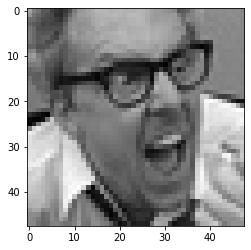

In [5]:
plt.imshow(img_array)

In [6]:
Datadirectory = "Training/"

In [7]:
Classes = ["0","1", "2","3","4","5","6"]

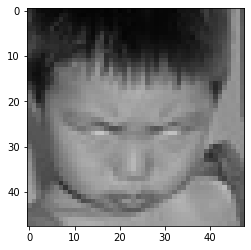

In [8]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

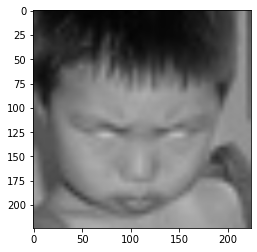

In [9]:
img_size= 224
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [10]:
new_array.shape

(224, 224, 3)

# read all images and converting into array

In [11]:
training_Data = []

def create_training_Data():
        for category in Classes:
            path = os.path.join(Datadirectory, category)
            class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass
    

In [12]:
create_training_Data()

In [13]:
print(len(training_Data))

3171


In [14]:
temp = np.array(training_Data)

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_28484/2755283514.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp = np.array(training_Data)


In [15]:
temp.shape

(3171, 2)

In [16]:
import random

random.shuffle(training_Data)

In [17]:
X = []
y = []

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X= np.array(X).reshape(-1, img_size, img_size, 3)

In [18]:
X.shape

(3171, 224, 224, 3)

In [19]:
X=X/255.0;

In [20]:
type(y)

list

In [21]:
y[0]

6

In [22]:
Y= np.array(y)

In [23]:
Y.shape

(3171,)

# deep learning model for training

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [25]:
model = tf.keras.applications.MobileNetV2()

In [26]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [27]:
base_input = model.layers[0].input

In [28]:
base_output = model.layers[-2].output

In [29]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [30]:
final_output = layers.Dense(128)(base_output)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_ouput)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_ouput)

In [31]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [32]:
new_model = keras.Model(inputs = base_input, outputs= final_output)

In [33]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [34]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [35]:
new_model.fit(X,Y, epochs = 1)

100/100 [==============================] - 343s 3s/step - loss: 0.0335 - accuracy: 0.9902


In [36]:
new_model.save('Final_model.h5')

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [37]:
new_model = tf.keras.models.load_model('Final_model.h5')

In [1]:
img = cv2.imread('disgust.jpg')

NameError: name 'cv2' is not defined

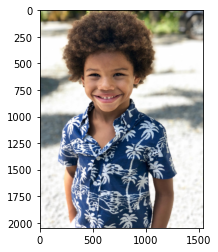

In [43]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [44]:
predictions = DeepFace.analyze(img)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.18it/s]


In [45]:
predictions

{'emotion': {'angry': 8.662761691400874e-07,
  'disgust': 1.2846078091547407e-13,
  'fear': 2.0278822053477717e-07,
  'happy': 99.99995827674617,
  'sad': 1.2048164573598042e-08,
  'surprise': 1.051438536735146e-05,
  'neutral': 3.208243888598619e-05},
 'dominant_emotion': 'happy',
 'region': {'x': 353, 'y': 406, 'w': 533, 'h': 533},
 'age': 28,
 'gender': 'Man',
 'race': {'asian': 15.061023831367493,
  'indian': 0.2514427062124014,
  'black': 0.04496860201470554,
  'white': 69.79575753211975,
  'middle eastern': 4.8114195466041565,
  'latino hispanic': 10.03539189696312},
 'dominant_race': 'white'}

In [46]:
predictions['dominant_emotion']

'happy'

In [47]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [48]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray,1.1,4)
for(x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

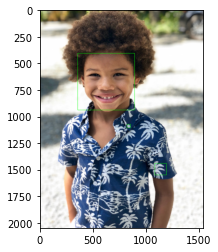

In [49]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [50]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,
                predictions['dominant_emotion'],
                (0, 500),
                font, 3,
                (0, 0, 255),
                2,
                cv2.LINE_4) ;

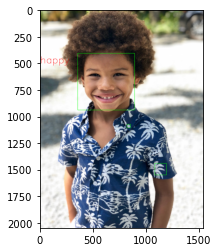

In [51]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# video demo

In [ ]:
import cv2

from deepface import DeepFace

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret,frame = cap.read()
    result = DeepFace.analyze(frame, actions = ['emotion'])
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    
    for(x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame,
                result['dominant_emotion'],
                (60, 60),
                font, 3,
                (0, 0, 255),
                2,
                cv2.LINE_4) 
    cv2.imshow('Demo', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):

        break
        
cap.release()
cv2.destroyAllWindows()
    
    